In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import pandas_datareader as pdr


-- 1. 
Importe la base de datos en Jupyter Notebook mediante el module de yahoo finance.

Durante la instalación de las  librerías 'pandas_datareader', tuve conflictos con las versiones de pandas. Intente incluso con un ambiente virtual y no funciono.  Como solución he descargado la data en csv sobre las acciones de la empresa Harley-Davidson.

Escogí esta base de datos motivado por la historia de las motocicletas Harley-Davidson. La base de datos inicia en el 02-01-2018 y culmina el 12-12-2022

In [ ]:
from statsmodels.tsa.stattools import adfuller
 
df = pd.read_csv('HOG.csv',index_col = 'Date',infer_datetime_format=True)
df.rename({'High':'precio_max', 'Low': 'precio_min', 'Open':'precio_apertura', 
           'Close': 'precio_cierre', 'Adj Close':'precio_ajustado_cierre'}, axis=1, inplace=True)
print(df.info())
df


<class 'pandas.core.frame.DataFrame'>
Index: 1246 entries, 2018-01-02 to 2022-12-12
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   precio_apertura         1246 non-null   float64
 1   precio_max              1246 non-null   float64
 2   precio_min              1246 non-null   float64
 3   precio_cierre           1246 non-null   float64
 4   precio_ajustado_cierre  1246 non-null   float64
 5   Volume                  1246 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.1+ KB
None


,precio_apertura,precio_max,precio_min,precio_cierre,precio_ajustado_cierre,Volume
Date,,,,,,
2018-01-02,51.180000,52.090000,50.680000,52.060001,46.032543,1583600
2018-01-03,50.380001,51.060001,49.770000,50.099998,44.299465,6693800
2018-01-04,50.099998,51.160000,49.330002,50.970001,45.068745,3136900
2018-01-05,51.080002,51.080002,50.270000,50.970001,45.068745,2226600
2018-01-08,50.889999,51.939999,50.720001,51.540001,45.572746,1742500
...,...,...,...,...,...,...
2022-12-06,47.610001,47.610001,45.930000,46.459999,46.301315,1025200
2022-12-07,46.189999,46.830002,46.060001,46.259998,46.101997,884400
2022-12-08,46.540001,46.540001,45.619999,45.709999,45.709999,644700


In [ ]:
df.index= pd.to_datetime(df.index)

In [ ]:
df.describe()

,precio_apertura,precio_max,precio_min,precio_cierre,precio_ajustado_cierre,Volume
count,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1.246000e+03
mean,37.225128,37.807360,36.623218,37.208491,35.367731,2.279842e+06
std,6.727336,6.710171,6.750941,6.730081,6.177613,2.135600e+06
min,15.690000,16.200001,14.310000,15.040000,14.547348,3.561000e+05
25%,34.650002,35.237499,34.095000,34.725001,32.803266,1.351400e+06
50%,37.389999,37.825001,36.754999,37.270000,35.973225,1.809800e+06
75%,41.280001,41.889999,40.722500,41.294999,38.617115,2.537925e+06
max,56.020000,56.500000,54.910000,55.950001,50.576145,4.154060e+07


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1246 entries, 2018-01-02 to 2022-12-12
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   precio_apertura         1246 non-null   float64
 1   precio_max              1246 non-null   float64
 2   precio_min              1246 non-null   float64
 3   precio_cierre           1246 non-null   float64
 4   precio_ajustado_cierre  1246 non-null   float64
 5   Volume                  1246 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.1 KB
None


Text(0.5, 1.0, 'Evolución de las acciones de Harley-Davidson')

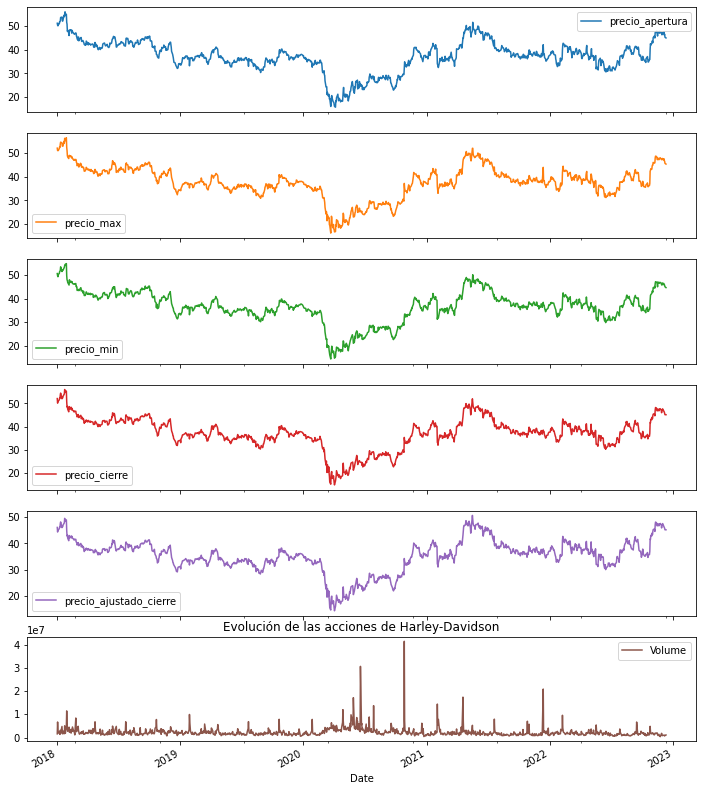

In [ ]:
df.plot(subplots=True, figsize=(12,15))
plt.title('Evolución de las acciones de Harley-Davidson')

2. Descomponga a la serie en sus componentes. ¿Qué periodicidad escogieron y por qué?


Mediante las gráficas podemos apreciar que la serie aparenta tener estacionariedad en media pero no en varianza. Guiándonos por los picos que aparentan ser semanales. He decidido tomar la estacionalidad de la serie de manera semanal.


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

In [ ]:
result1 = seasonal_decompose(df.precio_cierre, model='additive', period=20)

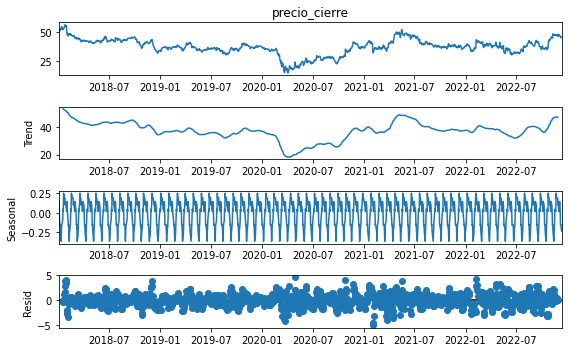

In [ ]:
result1.plot()
plt.show()

In [ ]:
tendencia1 = result1.trend.bfill().ffill()
estacional1 = result1.seasonal.bfill().ffill()
residuo1 = result1.resid.bfill().ffill()

In [ ]:
X1 = residuo1
result_DF = adfuller(X1)
print('ADF Statistic: %f' % result_DF[0])
print('p-value: %f' % result_DF[1])
print('Critical Values:')
for key, value in result_DF[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -11.845690
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


3. Escojan el formato de su serie de tiempo. Será esta en su estado original (diaria), semanal? mensual? anual? y argumente su respuesta.

La serie de tiempo escogida será de manera semanal, en nuestro primer análisis podemos observar que nuestro estadístico de ADF de -3.063 y nuestro valor p es de 0.029. Aquí, la estadística ADF no es un número negativo grande y el valor p es ligeramente menor que 0.05. Por lo tanto, nuestra serie de tiempo si aparenta estacionalidad. He decidido aplicar  transformaciones para observar otros resultados además nuestra grafica de ADF no oscila aunque aparentemente si converge a cero. En nuestra transformación obtuvimos mejores resultados vemos que ADF es mas negativo y p value es menos a 0.05. Por lo cual podemos rechazar la hipótesis nula(H_0: No es estacionaria).


In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
hd_semanal=df.precio_cierre.resample('W').mean()


In [ ]:
result_DF_diff1 = adfuller(hd_semanal)
print('ADF Statistic: %f' % result_DF_diff1[0])
print('p-value: %f' % result_DF_diff1[1])
print('Critical Values:')
for key, value in result_DF_diff1[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.063561
p-value: 0.029370
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573


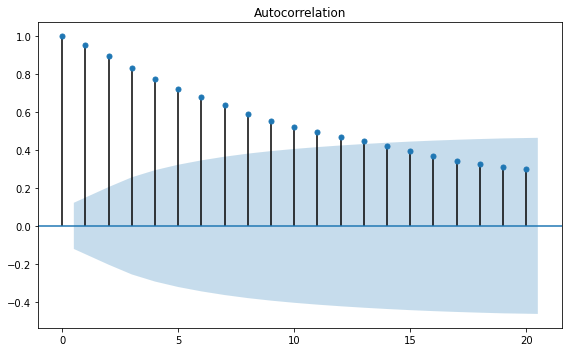

In [ ]:
plot_acf(hd_semanal, lags=20);
plt.tight_layout()

In [ ]:
precio_cierre_sema_diff1 = hd_semanal.diff(1).bfill()

In [ ]:
result_DF_diff1 = adfuller(precio_cierre_sema_diff1)
print('ADF Statistic: %f' % result_DF_diff1[0])
print('p-value: %f' % result_DF_diff1[1])
print('Critical Values:')
for key, value in result_DF_diff1[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -13.040042
p-value: 0.000000
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573


4. Basándose en el script de la Unidad No. 6, modele la serie y encuentre los componentes p, d y q. Explique como llegó a ellos.

Después de la primera diferenciación logramos ver que nuestra grafica de ACF oscila y converge a cero. Además, gracias al ejercicio anterior [375] podemos ver que en p value es menor a 0.05 y el ADF y PACF es -13.04. Por lo tanto existe estacionalidad. Para escoger los valores p,nos guiamos en los rezagos, por lo cual los valores de p y q son respectivamente 1, 1. Nuestro modelo final es
ARIMA(1,1,1)


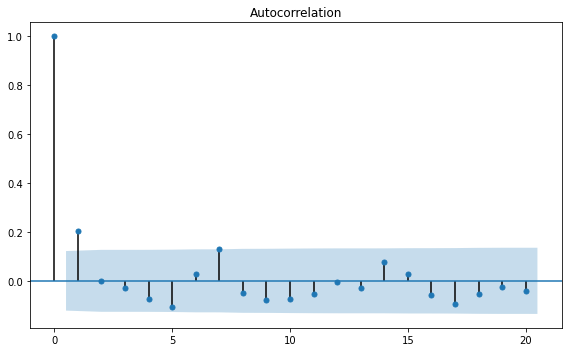

In [ ]:
plot_acf(precio_cierre_sema_diff1, lags=20);
plt.tight_layout()

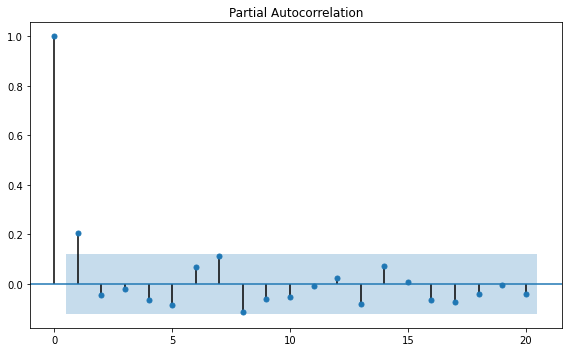

In [ ]:
plot_pacf(precio_cierre_sema_diff1, lags=20);
plt.tight_layout()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
p = 1
d = 1
q = 1



5. Evalúe su modelo. ¿Es este aceptable?

Segun los resultados obtenidos en el test P>|z|, vemos que todos los valores son cercanos a cero por lo tanto si existe variables significativas por lo cual nuestro modelo si es aceptable, posteriormente los resultados de las predicciones respaldan el modelo.

In [ ]:
modelo1 = ARIMA(precio_cierre_sema_diff1, order=(p, d, q))
resultado1 = modelo1.fit()
print(resultado1.summary())

                               SARIMAX Results                                
Dep. Variable:          precio_cierre   No. Observations:                  259
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -505.473
Date:                Wed, 14 Dec 2022   AIC                           1016.946
Time:                        04:13:35   BIC                           1027.605
Sample:                    01-07-2018   HQIC                          1021.232
                         - 12-18-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2079      0.061      3.394      0.001       0.088       0.328
ma.L1         -0.9995      0.231     -4.334      0.000      -1.451      -0.547
sigma2         2.8894      0.654      4.418      0.0

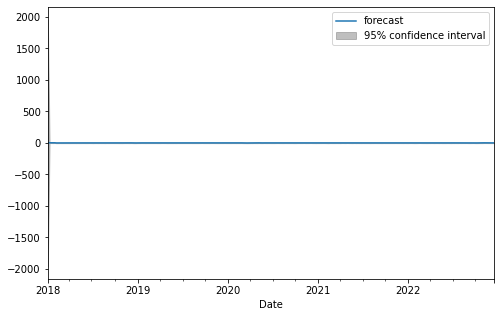

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(resultado1, dynamic=False)
plt.show()

In [ ]:
train_data=hd_mensual[0:int(len(hd_mensual)*0.9)]
test_data=hd_mensual[int(len(hd_mensual)*0.9):]

6. Prediga 5 períodos en el futuro. ¿Cómo se ven esas predicciones comparadas con los valores reales?

El resultado obtenido en la línea [411] podemos apreciar que si existe una similitud de los valores predichos y los valores observados. Además, podemos observar que existe un desfase o un retraso en las dos líneas.

In [ ]:
historico = train_data.tolist()
predicciones = []
n = len(test_data)
for time_point in range(n):
    model = ARIMA(historico, order=(p,d,q))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predicciones.append(yhat)
    true_test_value = test_data[time_point]
    historico.append(true_test_value)

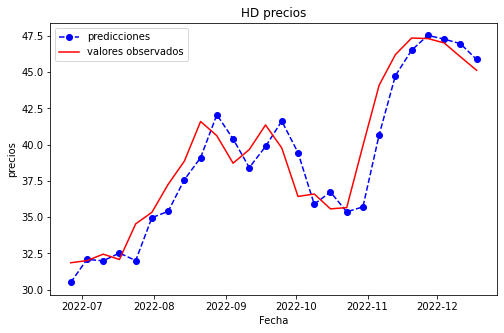

In [ ]:
rango = hd_mensual[int(len(hd_mensual)*0.9):].index
plt.plot(rango, predicciones, color='blue', marker='o', linestyle='dashed', label='predicciones')
plt.plot(rango, test_data, color='red', label='valores observados')
plt.title('HD precios')
plt.xlabel('Fecha')
plt.ylabel('precios')

plt.legend()
plt.show()

7. Realice el análisis de los errores. ¿Se obtuvieron resultados más centrados y alrededor de cero?

Basándonos en las gráficas de los residuos si existen valores cercanos a cero, además por el gráfico de la densidad vemos que los valores están cercanos a cero y no existe una varianza significativa. Finalmente podemos decir que la gráfica de los residuos es una serie estacionaria en media y varianza. 

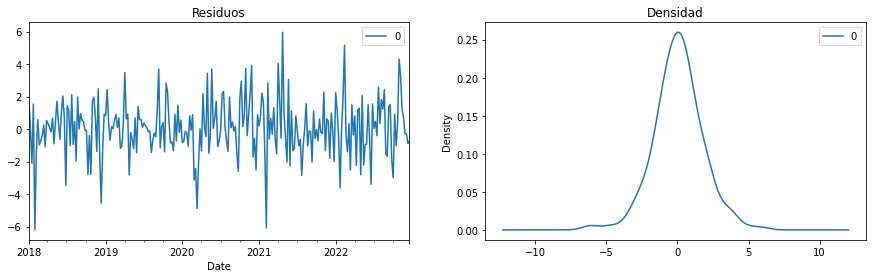

In [ ]:
residuos = pd.DataFrame(resultado1.resid)  
fig, ax = plt.subplots(1,2, figsize=(15,4))  
residuos.plot(title = "Residuos", ax = ax[0])  
residuos.plot(kind = 'kde', title = 'Densidad', ax = ax[1])  
plt.show()  

8. Concluya sobre la especificación de su modelo.



Nuestro modelo final es una ARIMA(1,1,1). Las acciones de la empresa de motocicletas Harley-Davidson mostró una estacionariedad en media pero no en varianza. Transformamos la serie de tiempo de diaria a semanal. El modelo definitivo se escogió tras la primera diferenciación, y mediante los residuos.
